# Importing Libraries

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt




<!--  -->

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [8]:
cnn = tf.keras.models.load_model('/Users/joyboy/Plant_Disease_Prediction/trained_plant_disease_model.keras')

#Visualising and Performing Prediction on Single image

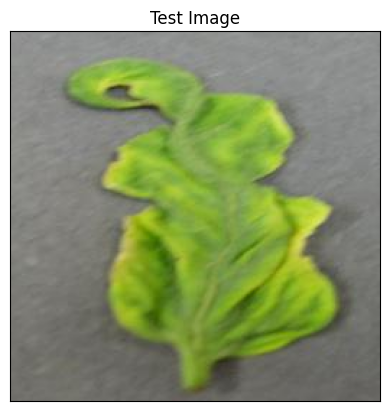

In [9]:
#Test Image V
import cv2
image_path = 'test/test/TomatoYellowCurlVirus5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [11]:
print(predictions)

[[7.01664679e-20 2.47260621e-24 3.37202597e-14 1.05149328e-18
  1.81121928e-18 8.23562988e-17 2.64374234e-21 4.07010472e-20
  1.43427767e-21 1.17551945e-20 2.60827501e-18 2.83173239e-17
  3.55612473e-18 9.46206410e-17 3.90683293e-17 2.11847832e-15
  5.59179316e-19 1.25507101e-22 5.43667187e-18 1.25853161e-16
  2.07617762e-25 2.52743744e-19 4.65096163e-17 2.76145700e-15
  2.52993578e-19 7.66421041e-12 9.84104426e-19 2.21976063e-19
  6.98351710e-10 1.55929225e-13 3.97010810e-12 5.91423285e-17
  4.27158916e-12 2.50271470e-14 2.45570122e-12 1.00000000e+00
  9.19449606e-15 8.93679383e-17]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


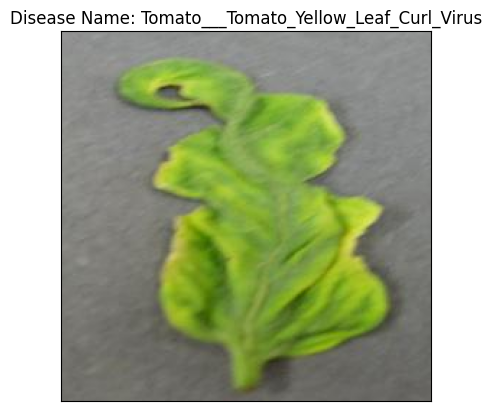

In [13]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()